# Life Expectancy & GDP

In this project we analyze data on GDP and life expectancy from the WHO (World Health Organization) and the World Bank to identify the relationship between these two factors.

## Import modules

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Data loading

In [2]:
data = pd.read_csv('all_data.csv')

## Data inspection

In [3]:
print(data.head())
print(data.info())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None


There are 96 rows and 4 columns. Let's change the name of the "Life expectancy at birth (years)" column. Then we have to find how many countries are there and the years in the data.

In [4]:
data = data.rename({'Life expectancy at birth (years)':'Life exp'}, axis = 'columns')
print("Countries:", data["Country"].unique())
print("Years from", str(data["Year"].min()), "to", str(data["Year"].max()))

Countries: ['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
Years from 2000 to 2015


Life expectancy evolution from 2000 to 2015

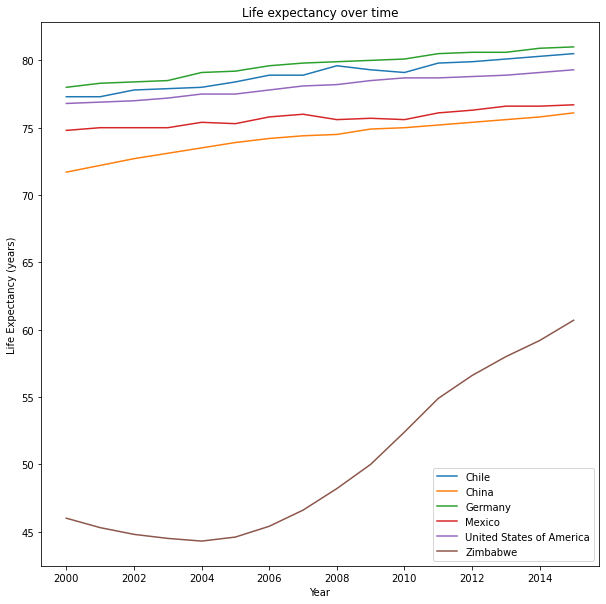

In [5]:
plt.figure(figsize = (10, 10))
sns.lineplot(data=data, x='Year', y='Life exp', hue='Country')
plt.ylabel('Life Expectancy (years)')
plt.legend()
plt.title('Life expectancy over time')
plt.show()

GDP evolution from 2000 to 2015

It seems that Life Expectancy has increased from the year 2000 to 2015 for all countries.
Now let's see what is about GDP.

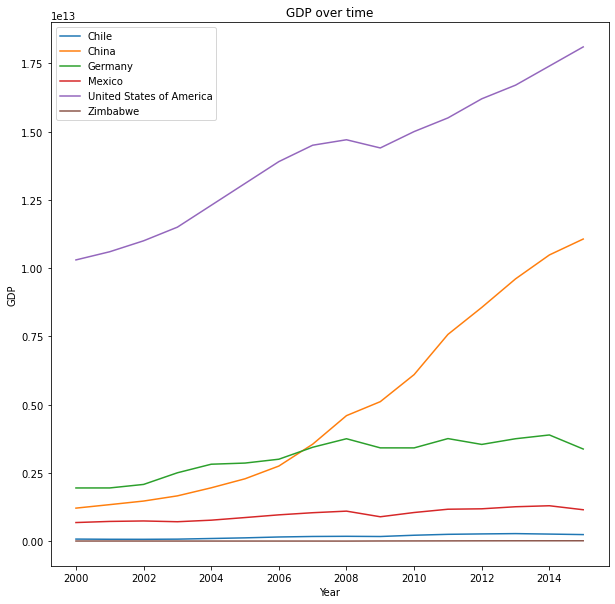

In [6]:
plt.figure(figsize = (10, 10))
sns.lineplot(data=data, x='Year', y='GDP', hue='Country')
plt.ylabel('GDP')
plt.legend()
plt.title('GDP over time')
plt.show()

There are huge differences between countries so it is hard to compare. Some countries, like US and China, have a very big increase, while others like Chile or Zimbabwe are like a flat line. Let's graph the countries in separate graphs.

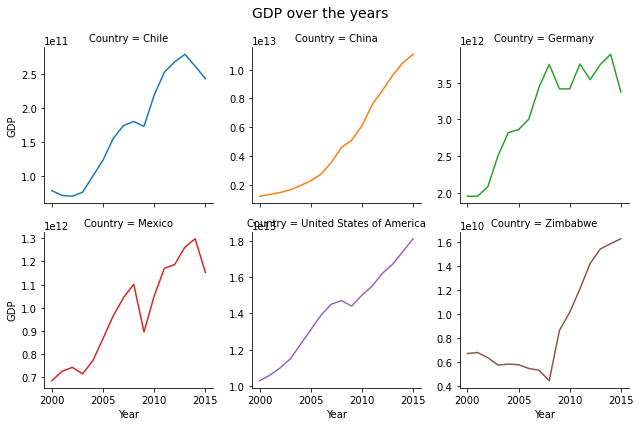

In [7]:
g = sns.FacetGrid(data, col='Country', hue='Country', col_wrap=3, sharey=False)
g.map(sns.lineplot,'Year','GDP')
g.set_ylabels('GDP')
g.fig.suptitle('GDP over the years', fontsize=14)
g.fig.tight_layout(rect=[0, 0, 1, 1])

So in every country there is an increase of the GDP during these years.

Now let's find if the trend of GDP an Life expectancy is correlated. First we need to normalize the data.

In [8]:
#trend of GDP and life expectancy by country over the years
#Min Max Normalisation so that can plot Life Expectancy and GDP on the same scale for each country:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

countries = data['Country'].unique()

country_data_life_dfs = []
country_data_gdp_dfs = []

for country in countries:
    
    country_data = data[data['Country'] == country]
    country_data_life = scaler.fit_transform(country_data[['Life exp']])
    country_data_life = np.reshape(country_data_life, -1)
    country_data_life = pd.Series(country_data_life)
    country_data_life_dfs.append(country_data_life)
    
    country_data_gdp = scaler.fit_transform(country_data[['GDP']])
    country_data_gdp = np.reshape(country_data_gdp, -1)
    country_data_gdp = pd.Series(country_data_gdp)
    country_data_gdp_dfs.append(country_data_gdp)
    
all_normalised_life = pd.concat(country_data_life_dfs).reset_index(drop = True)
all_normalised_gdp = pd.concat(country_data_gdp_dfs).reset_index(drop = True)

data['Normalised Life exp'] = all_normalised_life
data['Normalised GDP'] = all_normalised_gdp
print(data.head())

  Country  Year  Life exp           GDP  Normalised Life exp  Normalised GDP
0   Chile  2000      77.3  7.786093e+10              0.00000        0.038937
1   Chile  2001      77.3  7.097992e+10              0.00000        0.005958
2   Chile  2002      77.8  6.973681e+10              0.15625        0.000000
3   Chile  2003      77.9  7.564346e+10              0.18750        0.028309
4   Chile  2004      78.0  9.921039e+10              0.21875        0.141260


Now we can graph the evolution of life expectancy and GDP for every country

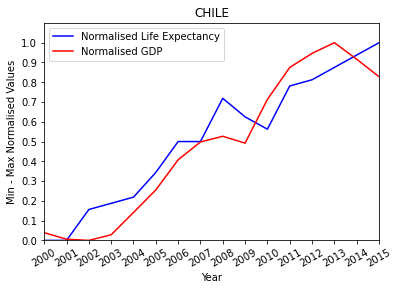

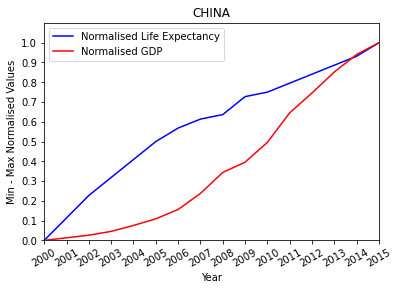

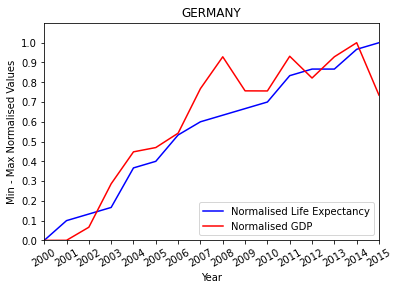

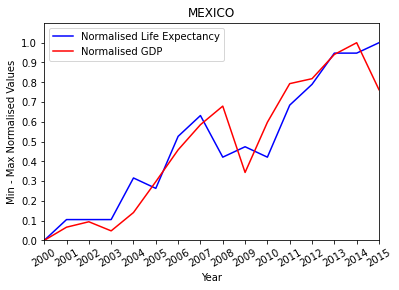

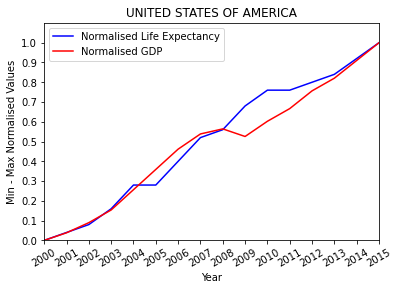

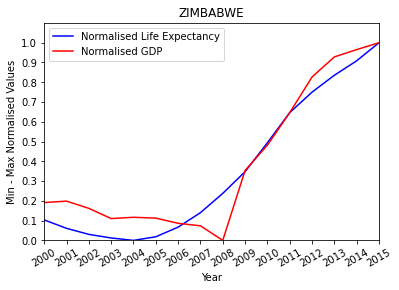

In [9]:
for country in countries:
    
    sns.lineplot(x = 'Year', y = 'Normalised Life exp', data = data[data["Country"] == country], color = 'b')
    sns.lineplot(x = 'Year', y = 'Normalised GDP', data = data[data["Country"] == country], color = 'r')
    
    plt.xticks(range(2000, 2016), rotation = 30)
    plt.yticks([x * 0.1 for x in range(11)])
    plt.axis(xmin = 2000, xmax = 2015, ymin = 0.0, ymax = 1.1)
    
    plt.title(country.upper())
    plt.xlabel('Year')
    plt.ylabel('Min - Max Normalised Values')
    plt.legend(['Normalised Life Expectancy', 'Normalised GDP'])
    plt.show()

For most countries, the trend is similar. Let's graph now the relationship between life expectancy and GDP

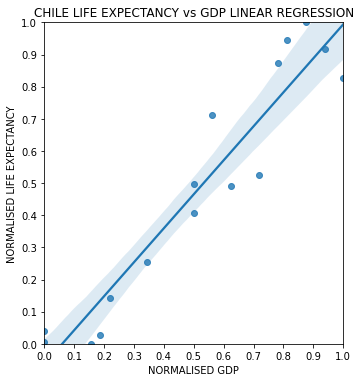

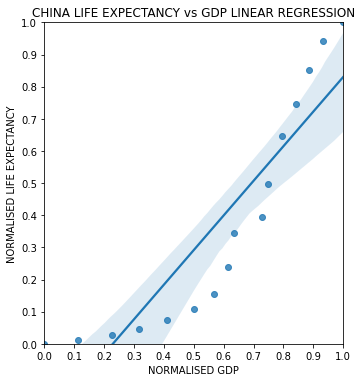

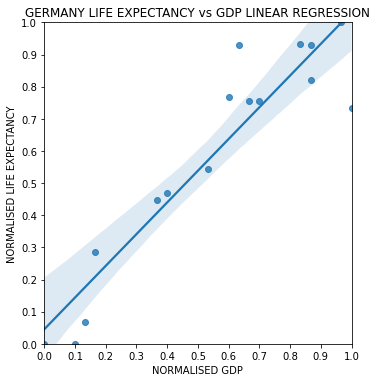

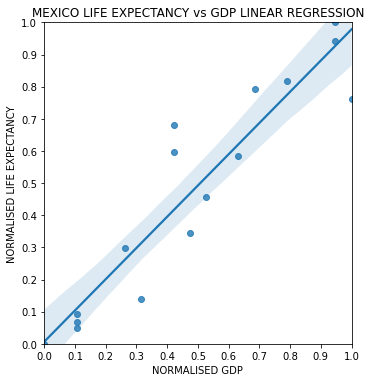

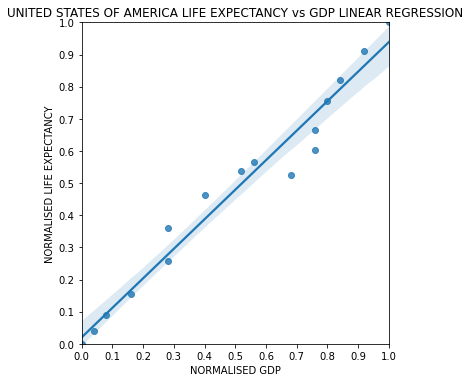

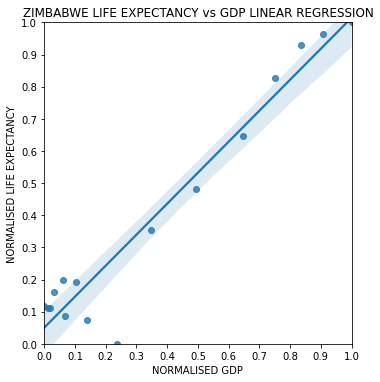

In [10]:
for country in countries:        
    sns.lmplot(x = 'Normalised Life exp' , y = 'Normalised GDP' , data = data[data["Country"] == country])

    sns.despine(top = False, right = False)
        
    plt.xticks([x * 0.1 for x in range(11)])
    plt.yticks([y * 0.1 for y in range(11)])
    plt.axis(xmin = 0.0, xmax = 1.0, ymin = 0.0, ymax = 1.0)
    
    plt.title(f'{country.upper()} LIFE EXPECTANCY vs GDP LINEAR REGRESSION')
    plt.xlabel('NORMALISED GDP')
    plt.ylabel('NORMALISED LIFE EXPECTANCY')
    
    plt.show()

So, it seems that there is a strong correlation. Let's calculate the correlation coefficient.

In [11]:
from scipy.stats import pearsonr

correlations = []

for country in countries:
    country_data = data[data['Country'] == country]
    correlation, p = pearsonr(country_data["GDP"], country_data["Life exp"])
    correlations.append([country, correlation, p])
    
correlations_df = pd.DataFrame(correlations, columns=["Country", "Pearson coefficient", "p-value"])

print(correlations_df)

                    Country  Pearson coefficient       p-value
0                     Chile             0.949877  1.865914e-08
1                     China             0.908526  1.125099e-06
2                   Germany             0.932699  1.401882e-07
3                    Mexico             0.932238  1.468696e-07
4  United States of America             0.981709  1.749971e-11
5                  Zimbabwe             0.966200  1.235852e-09


There is a strong correlation for every country.

## Conclusions

- Life expectancy and GDP has increased in every country.
- The trend of both factors are similar in every country.
- GDP and life expectancy exhibited a positive correlation in all six nations.